<a href="https://colab.research.google.com/github/Aravinda89/Image-Classificatio-from-Scratch/blob/main/CH_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 189 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 


In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd
import os
import random

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
IMAGE_PATH = 'gdrive/MyDrive/DataSets/CH_mnist/data'

In [5]:
path = Path(IMAGE_PATH)
Path.BASE_PATH = path

In [6]:
len(path.ls())

15000

In [7]:
path.ls()[:5]

(#5) [Path('input_84_5_4.jpg'),Path('input_97_5_3.jpg'),Path('input_94_7_14.jpg'),Path('input_84_6_11.jpg'),Path('input_88_10_4.jpg')]

In [8]:
file_list = path.ls()

gdrive/MyDrive/DataSets/CH_mnist/data/input_7_2_15.jpg


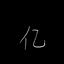

In [10]:
img_file = random.choice(file_list)
print(img_file)
im = Image.open(img_file)
im

In [11]:
im.size

(64, 64)

In [12]:
ls gdrive/MyDrive/DataSets/CH_mnist/

chinese_mnist.csv  data/


In [13]:
df = pd.read_csv("gdrive/MyDrive/DataSets/CH_mnist/chinese_mnist.csv")
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [14]:
df['img_name'] = 'input_'+ df['suite_id'].astype(str) + '_' + df['sample_id'].astype(str) + '_' +  df['code'].astype(str)+'.jpg'

In [15]:
df

,suite_id,sample_id,code,value,character,img_name
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg
...,...,...,...,...,...,...
14995,99,5,9,8,八,input_99_5_9.jpg
14996,99,6,9,8,八,input_99_6_9.jpg
14997,99,7,9,8,八,input_99_7_9.jpg
14998,99,8,9,8,八,input_99_8_9.jpg


In [79]:
df['value'].astype(str).value_counts()

1            1000
8            1000
3            1000
10           1000
1000         1000
2            1000
5            1000
7            1000
0            1000
6            1000
9            1000
100000000    1000
4            1000
10000        1000
100          1000
Name: value, dtype: int64

In [17]:
path

Path('.')

In [73]:
def get_x(r): return path/r['img_name']

def get_y(r): return r['value'].astype(str).split(" ")
# def get_y(r): return r['value'].astype(str)

In [74]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter = RandomSplitter(valid_pct=0.2, seed=66),
                   get_x = get_x,
                   get_y = get_y,
                   batch_tfms= RandomResizedCrop(128,min_scale=0.35))

dls = dblock.dataloaders(df)

In [75]:
len(dls.train), len(dls.valid)

(187, 47)

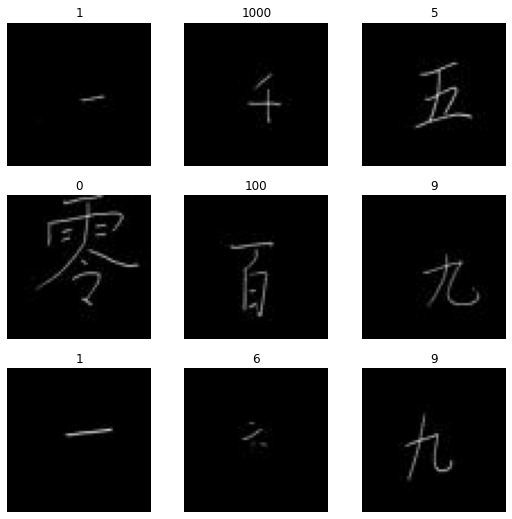

In [76]:
dls.show_batch()

In [77]:
xb, yb = dls.one_batch()

In [78]:
xb.shape, yb.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64, 15]))

In [80]:
yb

TensorMultiCategory([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       

In [60]:
dls.train_ds

(#12000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0.

In [61]:
dls.valid_ds

(#3000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0.,

In [1]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi,thresh=0.5))

NameError: ignored

In [85]:
learn.summary()

Sequential (Input shape: 64 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                        

SuggestedLRs(valley=0.0030199517495930195)

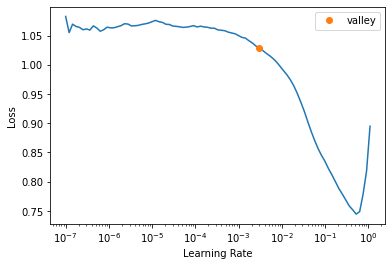

In [86]:
learn.lr_find()

In [87]:
learn.fit_one_cycle(10, lr_max=0.0030199517495930195, 
                    cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3),
                    ReduceLROnPlateau(monitor='valid_loss', patience=2)])

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.681560,0.353614,0.382978,01:05
1,0.116365,0.048869,0.977578,01:04
2,0.035973,0.017984,0.993489,01:05


KeyboardInterrupt: ignored

In [ ]:
learn.unfreeze()

learn.lr_find()